### Homework Rakamin Trial Class - Mini Case<br>
# Mengukur Performa Penjualan Ritel Online

# Import Package

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load Data

In [32]:
df = pd.read_csv("dataset.csv", parse_dates=['InvoiceDate'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Section 1

### Create New Feature: Year

In [33]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

tipedata kolom InvoiceDate sudah menjadi tipedata datetime

In [34]:
df['Year']= df['InvoiceDate'].dt.year
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
844804,564849,22179,SET 10 NIGHT OWL LIGHTS,2,2011-08-30 15:42:00,6.75,17675.0,United Kingdom,2011
68525,495415,20665,RED SPOTTY PURSE,6,2010-01-25 11:32:00,2.95,18199.0,United Kingdom,2010
999873,576840,23245,SET OF 3 REGENCY CAKE TINS,4,2011-11-16 15:23:00,10.79,NaN,United Kingdom,2011
774781,558902,21930,JUMBO STORAGE BAG SKULLS,10,2011-07-04 16:08:00,2.08,13001.0,United Kingdom,2011
790532,560209,23093,SMALL PARISIENNE HEART PHOTO FRAME,4,2011-07-15 14:05:00,2.49,15004.0,United Kingdom,2011
470800,533750,20618,QUEEN OF THE SKIES PASSPORT COVER,2,2010-11-18 14:17:00,2.10,15571.0,United Kingdom,2010
667962,548612,22241,GARLAND WOODEN HAPPY EASTER,4,2011-04-01 11:34:00,1.25,13137.0,United Kingdom,2011
56669,494480,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2010-01-14 16:16:00,7.95,15768.0,United Kingdom,2010
998111,576695,23057,BEADED CHANDELIER T-LIGHT HOLDER,1,2011-11-16 12:25:00,4.95,16469.0,United Kingdom,2011
732840,554986,21937,STRAWBERRY PICNIC BAG,3,2011-05-29 12:35:00,2.95,14451.0,United Kingdom,2011


memasukkan nilai tahun dari kolom InvoiceDate kedalam kolom baru Year

### Filtering Data

In [14]:
df_filtered = df[(df["Quantity"] > 0) & (~df["Invoice"].str.contains("C"))]
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
353382,523747,79067,CORONA MEXICAN TRAY,1,2010-09-23 18:07:00,3.75,NaN,United Kingdom,2010
6051,489866,85231B,CINAMMON SET OF 9 T-LIGHTS,2,2009-12-02 15:04:00,0.85,16200.0,United Kingdom,2009
66558,495331,15056P,EDWARDIAN PARASOL PINK,1,2010-01-22 16:28:00,5.95,17799.0,United Kingdom,2010
958972,573924,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,2011-11-02 09:45:00,0.83,15065.0,United Kingdom,2011
250406,513594,22433,WATERING CAN GREEN DINOSAUR,1,2010-06-27 10:54:00,1.95,16782.0,United Kingdom,2010
296311,518230,21411,GINGHAM HEART DOORSTOP RED,2,2010-08-05 15:14:00,4.25,14395.0,United Kingdom,2010
406490,528330,21888,BINGO SET,4,2010-10-21 13:27:00,3.75,13836.0,United Kingdom,2010
798170,560773,22559,SEASIDE FLYING DISC,2,2011-07-20 16:17:00,0.83,NaN,United Kingdom,2011
931504,571726,22930,BAKING MOULD HEART MILK CHOCOLATE,6,2011-10-19 09:00:00,2.55,16191.0,United Kingdom,2011
54373,494379,20748,KENSINGTON COFFEE SET,3,2010-01-13 17:08:00,8.47,NaN,United Kingdom,2010


membuang nilai pada kolom quantity dibawah 0 dan membuang data yang mengandung 'C' pada kolom Invoice

In [15]:
print("non filter data:", df.shape)
print("filtered data:", df_filtered.shape)

non filter data: (1067371, 9)
filtered data: (1044420, 9)


### Create New Feature: Revenue

In [16]:
df['Revenue'] = df['Quantity'] * df['Price']
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
672126,549014,22269,EGG CUP NATURAL CHICKEN,2,2011-04-05 15:00:00,1.25,17841.0,United Kingdom,2011,2.50
88558,497715,21500,PINK SPOTS WRAP,300,2010-02-11 17:33:00,0.34,15061.0,United Kingdom,2010,102.00
154582,504109,21557,SET OF 6 FUNKY BEAKERS,1,2010-04-09 14:58:00,5.74,NaN,United Kingdom,2010,5.74
105911,499502,47578A,ENGLISH ROSE SMALL SCENTED FLOWER,1,2010-02-28 15:01:00,0.85,14044.0,United Kingdom,2010,0.85
627120,544928,84987,SET OF 36 TEATIME PAPER DOILIES,1,2011-02-24 18:07:00,2.92,NaN,United Kingdom,2011,2.92
1008612,577495,22491,PACK OF 12 COLOURED PENCILS,1,2011-11-20 12:20:00,0.85,14704.0,United Kingdom,2011,0.85
305694,519216,21929,JUMBO BAG PINK VINTAGE PAISLEY,10,2010-08-15 11:50:00,1.95,15641.0,United Kingdom,2010,19.50
673621,549185,22666,RECIPE BOX PANTRY YELLOW DESIGN,6,2011-04-07 09:35:00,2.95,18272.0,United Kingdom,2011,17.70
974559,575086,23514,EMBROIDERED RIBBON REEL SALLY,6,2011-11-08 13:52:00,2.08,16618.0,United Kingdom,2011,12.48
676419,549525,22893,MINI CAKE STAND T-LIGHT HOLDER,4,2011-04-08 15:44:00,0.83,NaN,United Kingdom,2011,3.32


### Average of Revenue per Year

In [17]:
df.groupby("Year")['Revenue'].agg([np.mean])

,mean
Year,
2009,17.684777
2010,18.152555
2011,18.018195


mean per year

<AxesSubplot:xlabel='Year'>

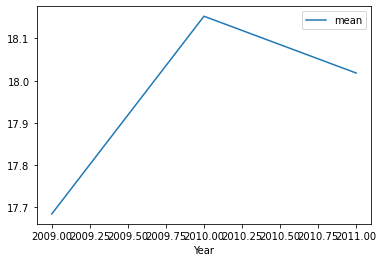

In [18]:
df.groupby("Year")['Revenue'].agg([np.mean]).plot()

visualization

### Interpretation

pada tahun 2009, rata-rata pendapatan sekitar 17.68<br> 
Kemudian pada tahun 2010 terdapat kenaikan pendapatan sekitar 2.5% sehingga menjadi 18.15<br> 
Pada tahun 2011 terjadi penurun pendapatan sekitar 0.78% yang membuat rata-rata pendapatan pada tahun 2011 menjadi 18.01

# Section 2

### Filtering Data

#### Customer who Finished ther Purchases

In [19]:
df_filtered.isnull().sum()

Invoice             0
StockCode           0
Description      1693
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238800
Country             0
Year                0
dtype: int64

In [20]:
finished = df_filtered[(~df_filtered['Customer ID'].isna())]
finished.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Year           0
dtype: int64

In [21]:
print("non filter data:", df_filtered.shape)
print("filtered data:", finished.shape)

non filter data: (1044420, 9)
filtered data: (805620, 9)


In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


#### Customers who canceled their purchases

In [23]:
cancel = df[(df['Invoice'].str.contains("C"))]
cancel.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
593879,C541868,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2011-01-24 09:30:00,1.25,14796.0,United Kingdom,2011,-2.50
188369,C507274,47505,MINATURE COLOURED GARDENING SET,-10,2010-05-07 12:49:00,4.25,14824.0,United Kingdom,2010,-42.50
858499,C566165,22423,REGENCY CAKESTAND 3 TIER,-1,2011-09-09 11:57:00,12.75,14911.0,EIRE,2011,-12.75
386465,C526523,22635,CHILDS BREAKFAST SET DOLLY GIRL,-1,2010-10-12 11:16:00,9.95,NaN,United Kingdom,2010,-9.95
203438,C509015,21790,VINTAGE SNAP CARDS,-3,2010-05-19 13:36:00,0.85,14598.0,United Kingdom,2010,-2.55
530723,C536854,21871,SAVE THE PLANET MUG,-1,2010-12-03 10:09:00,1.25,15240.0,United Kingdom,2010,-1.25
818558,C562577,23207,LUNCH BAG ALPHABET DESIGN,-1,2011-08-07 13:09:00,1.65,15518.0,United Kingdom,2011,-1.65
222443,C511024,21175,GIN + TONIC DIET METAL SIGN,-1,2010-06-06 09:41:00,2.10,16242.0,United Kingdom,2010,-2.10
197096,C508240,22138,BAKING SET 9 PIECE RETROSPOT,-3,2010-05-13 19:53:00,4.95,14329.0,United Kingdom,2010,-14.85
564070,C539589,D,Discount,-1,2010-12-20 13:14:00,13.88,14527.0,United Kingdom,2010,-13.88


### Number of Finished and Canceled Transactions Each Year

#### Transaction Finished

In [24]:
finished["Year"].value_counts().sort_values()

2009     30761
2011    371765
2010    403094
Name: Year, dtype: int64

In [25]:
finished["Year"].value_counts().sum()

805620

transaksi berhasil berjumlah 805620 dari total 3 tahun 2009, 2010, dan 2011

<AxesSubplot:xlabel='Year', ylabel='count'>

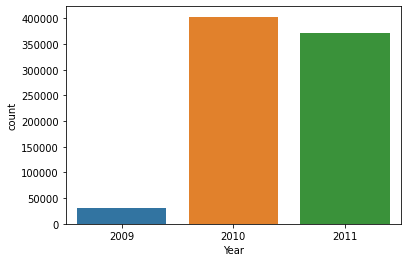

In [26]:
sns.countplot(x="Year", data=finished)

#### Transaction Canceled

In [27]:
cancel["Year"].value_counts().sort_values()

2009    1015
2011    8560
2010    9919
Name: Year, dtype: int64

In [28]:
cancel["Year"].value_counts().sum()

19494

transaksi yang dibatalkan berjumlah 19494 dari total 3 tahun 2009, 2010, dan 2011

<AxesSubplot:xlabel='Year', ylabel='count'>

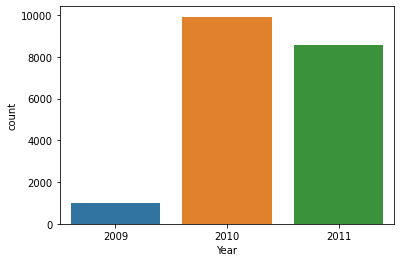

In [29]:
sns.countplot(x="Year", data=cancel)

### Cancellation Rate

In [30]:
cancellation_rate_2009 = (cancel[cancel["Year"] == 2009].shape[0] / df[df['Year'] == 2009].shape[0])*100
cancellation_rate_2010 = (cancel[cancel["Year"] == 2010].shape[0] / df[df['Year'] == 2010].shape[0])*100
cancellation_rate_2011 = (cancel[cancel["Year"] == 2011].shape[0] / df[df['Year'] == 2011].shape[0])*100

print('Cancellation rate in 2009:', cancellation_rate_2009)
print('Cancellation rate in 2010:', cancellation_rate_2010)
print('Cancellation rate in 2011:', cancellation_rate_2011)

Cancellation rate in 2009: 2.2441850181303615
Cancellation rate in 2010: 1.8975960085247383
Cancellation rate in 2011: 1.7139573392814595


### Interpretasi

rasio pembatalan mengalami penurunan dari tahun ketahun yang dilihat dari rasio pada tahun 2009 sebesar 2.2% dan 2010 mengalami penurunan sebesar 15% sehingga menjadi 1.9% dan pada tahun 2011 mengalami penurunan sebesar 12% sehingga menjadi 1.7%